In [1]:
%matplotlib inline

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from datetime import datetime
from datetime import timezone

from math import cos, radians
from shapely.geometry import Point
from shapely.geometry.polygon import Polygon

In [2]:
def plot_TMA_EIDW():
    
    TMA_lon=[-5.5000, -5.5000, -5.5000, -5.5000, -5.5000, -6.6169, -6.8333, -7.3333, -7.3333, -6.7606, -5.5000];

    TMA_lat=[53.9167, 53.7672, 53.0975, 52.7594, 52.3333, 52.6139, 52.7594, 53.0908, 53.7522, 54.1619, 53.9167];
    
    # Runway 10R
    rwy10R_lon=[-6.290075, -6.250578];
    rwy10R_lat=[53.42243, 53.42026];

    # Runway 28L
    rwy28L_lon=[-6.250578, -6.290075];
    rwy28L_lat=[53.42026, 53.42243];

    # Runway 16
    rwy16_lon=[-6.261978, -6.249594];
    rwy16_lat=[53.43699, 53.41991];

    # Runway 34
    rwy34_lon=[6.249594, -6.261978];
    rwy34_lat=[53.41991, 53.43699];

    plt.plot(TMA_lon, TMA_lat, color="blue")
    plt.plot(rwy10R_lon, rwy10R_lat, color="red")
    plt.plot(rwy16_lon, rwy16_lat, color="red")
    
    # Entry Points
    ABLIN_lon = -4.9925
    ABLIN_lat =	52.7828
    BAGSO_lon = -5.5000
    BAGSO_lat =	53.6800
    BAMLI_lon = -6.6511
    BAMLI_lat =	54.1412
    BOYNE_lon = -5.5000
    BOYNE_lat =	53.7671
    BUNED_lon = -6.6301
    BUNED_lat =	52.6228
    LIPGO_lon = -5.5000
    LIPGO_lat =	53.0639
    NIMAT_lon = -5.7421
    NIMAT_lat =	53.9650
    OLAPO_lon = -7.2946
    OLAPO_lat =	53.7803
    OSGAR_lon = -7.2702
    OSGAR_lat =	53.0494
    SUTEX_lon = -6.9304
    SUTEX_lat =	52.8244
    VATRY_lon = -5.5000
    VATRY_lat =	52.5544

    plt.plot(ABLIN_lon, ABLIN_lat, 'ro')
    plt.plot(BAGSO_lon, BAGSO_lat, 'ro')
    plt.plot(BAMLI_lon, BAMLI_lat, 'ro')
    plt.plot(BOYNE_lon, BOYNE_lat, 'ro')
    plt.plot(BUNED_lon, BUNED_lat, 'ro')
    plt.plot(LIPGO_lon, LIPGO_lat, 'ro')
    plt.plot(NIMAT_lon, NIMAT_lat, 'ro')
    plt.plot(OLAPO_lon, OLAPO_lat, 'ro')
    plt.plot(OSGAR_lon, OSGAR_lat, 'ro')
    plt.plot(SUTEX_lon, SUTEX_lat, 'ro')
    plt.plot(VATRY_lon, VATRY_lat, 'ro')
    
    rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
    rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];
    
    plt.plot(rwy28L_around_lon, rwy28L_around_lat)

In [3]:
 def plot_horizontal_profile_EIDW(df, runway, linewidth):
    
    #plt.figure(figsize=(6,6))
    fig, ax = plt.subplots(1, 1,figsize=(10,10))
    
    central_latitude = 53.25
    # calculate the aspect ratio that will approximate a 
    # Mercator projection at this central latitude 
    mercator_aspect_ratio = 1/cos(radians(central_latitude))

    # set the aspect ratio of the axes to that
    ax.set_aspect(mercator_aspect_ratio)

    #plt.axes().set_aspect('equal')
    
    #ax.set_aspect('equal', adjustable='box')
    #ax.set_xlim(16,20)
    #ax.set_ylim(57.5,61.5)
    
    plt.xlabel('Longitude', fontsize=25)
    plt.ylabel('Latitude', fontsize=25)  
    
    plt.tick_params(labelsize=15)
    
    plot_TMA_EIDW()
    
    if df.empty:
        return
    
    for flight_id, new_df in df.groupby(level='flight_id'):
        #print(flight_id)
        flight_states_opensky_df = df.loc[(flight_id,), :]
        lon = []
        lat = []
        for seq, row in flight_states_opensky_df.groupby(level='sequence'):
        
            if row['lon'].item() != 0:
                lon.append(row['lon'].item())
            if row['lat'].item() != 0:
                lat.append(row['lat'].item())
            
        last_points_lon = lon[-30:]
        last_points_lat = lat[-30:]
        plt.plot(lon, lat, color='k', linewidth=linewidth)
        #plt.plot(last_points_lon, last_points_lat, color='r', linewidth=linewidth)

In [4]:
def plot_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['altitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)


In [5]:
def plot_raw_vertical_profile(flight_df, final_approach, linewidth):
    
    df = flight_df[flight_df['altitude']>=final_approach]
       
    for flight_id, flight_id_group in df.groupby(level='flight_id'):
        flight_states_df = df.loc[(flight_id,), :]
        
        flight_states_df =flight_states_df.sort_index(level=['sequence'], ascending = False)
        
        if not flight_states_df.empty:

            opensky_states_altitudes = flight_id_group['rawAltitude'].tolist()
            opensky_states_times = flight_id_group.index.get_level_values('sequence').tolist()

            prev_altitude = final_approach
                
            plt.plot(opensky_states_times, opensky_states_altitudes, color='k', linewidth=linewidth)

# Data uploading

In [23]:
filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week1_old.csv"
#filename = "../data/EIDW/2019/osn_EIDW_states_TMA_after_filtering_2019/osn_EIDW_states_TMA_2019_10_week1.csv"
EIDW_states_2019_10_week1_df = pd.read_csv(filename, sep=' ',
                            names = ['flight_id', 'sequence', 'timestamp', 'lat', 'lon', 'rawAltitude', 'altitude', 'velocity', 'date'])
EIDW_states_2019_10_week1_df.set_index(['flight_id', 'sequence'], inplace = True)

filename = "../data/EIDW/2019/PIs/PIs_horizontal_by_flight_2019_10_week1.csv"
horizontal_PIs_df = pd.read_csv(filename, sep=' ')
horizontal_PIs_df.set_index(['flight_id'], inplace=True)

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1.csv"
filename = "../data/EIDW/2019/PIs/PIs_vertical_by_flight_2019_10_week1_rwy28R.csv"
vertical_PIs_by_flight_df = pd.read_csv(filename, sep=' ')

#filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1.csv"
filename = "../data/EIDW/2019/PIs/PIs_vertical_by_hour_2019_10_week1_rwy28R.csv"
vertical_PIs_by_hour_df = pd.read_csv(filename, sep=' ')

'''for flight_id, flight_id_group in horizontal_PIs_df.groupby(level='flight_id'):
    if flight_id_group['runway'].values == "28L":
        descent_end_altitude = 2500
    else:
        descent_end_altitude = 3000
    descent_end_altitude = descent_end_altitude / 3.281 # feet to meters
    last_altitude = EIDW_states_2019_10_week1_df.loc[flight_id][['altitude']].values[-1]
    if last_altitude > descent_end_altitude:
        print(flight_id)'''
#191001ETH502
#191001THY6UG
#191007BTI6A1

'''rwy28L_lon=[-6.250578, -6.290075];
rwy28L_lat=[53.42026, 53.42243];

#rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
#rwy28L_around_lat=[53.415, 53.427, 53.427, 53.415, 53.415];

rwy28L_around_lon=[-6.2,   -6.2,   -6.35 ,  -6.35, -6.2];
rwy28L_around_lat=[53.37, 53.47, 53.47, 53.37, 53.37];

def check_rwy_contains_point(point):

    lons_lats_vect = np.column_stack((rwy28L_around_lon, rwy28L_around_lat)) # Reshape coordinates
    polygon = Polygon(lons_lats_vect) # create polygon

    return polygon.contains(point)

count = 0
for flight_id, flight_id_group in horizontal_PIs_df.groupby(level='flight_id'):
    if flight_id_group['runway'].values == "28L":
        # check if last point near the runway
    
        last_lat = EIDW_states_2019_10_week1_df.loc[flight_id][['lat']].values[-1]
        last_lon = EIDW_states_2019_10_week1_df.loc[flight_id][['lon']].values[-1]
        
        if (not check_rwy_contains_point(Point(last_lon, last_lat))):
            count = count + 1
            print(flight_id, last_lat, last_lon)
print(count)'''
#191001ETH502
#191007BTI6A1

In [7]:
#df = EIDW_states_2019_10_week1_df[EIDW_states_2019_10_week1_df['date']==191007]
df = EIDW_states_2019_10_week1_df
#plot_horizontal_profile_EIDW(df, "x", 2)

In [8]:
min = horizontal_PIs_df['TMA_additional_distance'].min()
temp_df = horizontal_PIs_df[horizontal_PIs_df['TMA_additional_distance']==min]
print(temp_df)

                date  hour entry_point runway  reference_distance  \
flight_id                                                           
191005EIN118  191005     3       OSGAR     16            182422.0   

              TMA_distance  TMA_additional_distance  
flight_id                                            
191005EIN118     97301.218               -85120.782  


In [9]:
median_add_distance = horizontal_PIs_df['TMA_additional_distance'].median()
mean_add_distance = horizontal_PIs_df['TMA_additional_distance'].mean()
print(median_add_distance)
print(mean_add_distance)

-108.625
10277.601024590143


In [10]:
NIMAT_rwy10L_df = pd.DataFrame()
NIMAT_rwy28R_df = pd.DataFrame()
NIMAT_rwy16_df = pd.DataFrame()
NIMAT_rwy34_df = pd.DataFrame()
BOYNE_rwy10L_df = pd.DataFrame()
BOYNE_rwy28R_df = pd.DataFrame()
BOYNE_rwy16_df = pd.DataFrame()
BOYNE_rwy34_df = pd.DataFrame()
BAGSO_rwy10L_df = pd.DataFrame()
BAGSO_rwy28R_df = pd.DataFrame()
BAGSO_rwy16_df = pd.DataFrame()
BAGSO_rwy34_df = pd.DataFrame()
LIPGO_rwy10L_df = pd.DataFrame()
LIPGO_rwy28R_df = pd.DataFrame()
LIPGO_rwy16_df = pd.DataFrame()
LIPGO_rwy34_df = pd.DataFrame()
ABLIN_rwy10L_df = pd.DataFrame()
ABLIN_rwy28R_df = pd.DataFrame()
ABLIN_rwy16_df = pd.DataFrame()
ABLIN_rwy34_df = pd.DataFrame()
VATRY_rwy10L_df = pd.DataFrame()
VATRY_rwy28R_df = pd.DataFrame()
VATRY_rwy16_df = pd.DataFrame()
VATRY_rwy34_df = pd.DataFrame()
BAMLI_rwy10L_df = pd.DataFrame()
BAMLI_rwy28R_df = pd.DataFrame()
BAMLI_rwy16_df = pd.DataFrame()
BAMLI_rwy34_df = pd.DataFrame()
OLAPO_rwy10L_df = pd.DataFrame()
OLAPO_rwy28R_df = pd.DataFrame()
OLAPO_rwy16_df = pd.DataFrame()
OLAPO_rwy34_df = pd.DataFrame()
OSGAR_rwy10L_df = pd.DataFrame()
OSGAR_rwy28R_df = pd.DataFrame()
OSGAR_rwy16_df = pd.DataFrame()
OSGAR_rwy34_df = pd.DataFrame()
SUTEX_rwy10L_df = pd.DataFrame()
SUTEX_rwy28R_df = pd.DataFrame()
SUTEX_rwy16_df = pd.DataFrame()
SUTEX_rwy34_df = pd.DataFrame()
BUNED_rwy10L_df = pd.DataFrame()
BUNED_rwy28R_df = pd.DataFrame()
BUNED_rwy16_df = pd.DataFrame()
BUNED_rwy34_df = pd.DataFrame()

for flight_id, flight_id_group in df.groupby(level='flight_id'):
    #flight_entry_point =  horizontal_PIs_df.loc[flight_id][['entry_point']].values[0]
    #print(flight_entry_point)
    runway = horizontal_PIs_df.loc[flight_id][['runway']].values[0]
    
    entry_point = horizontal_PIs_df.loc[flight_id][['entry_point']].values[0]
    
    # "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
    if entry_point == "NIMAT":
        if runway == "10R":
            NIMAT_rwy10L_df = NIMAT_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            NIMAT_rwy28R_df = NIMAT_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            NIMAT_rwy16_df = NIMAT_rwy16_df.append(flight_id_group)
        else:
            NIMAT_rwy34_df = NIMAT_rwy34_df.append(flight_id_group)
    elif entry_point == "BOYNE":
        if runway == "10R":
            BOYNE_rwy10L_df = BOYNE_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            BOYNE_rwy28R_df = BOYNE_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            BOYNE_rwy16_df = BOYNE_rwy16_df.append(flight_id_group)
        else:
            BOYNE_rwy34_df = BOYNE_rwy34_df.append(flight_id_group)
    elif entry_point == "BAGSO":
        if runway == "10R":
            BAGSO_rwy10L_df = BAGSO_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            BAGSO_rwy28R_df = BAGSO_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            BAGSO_rwy16_df = BAGSO_rwy16_df.append(flight_id_group)
        else:
            BAGSO_rwy34_df = BAGSO_rwy34_df.append(flight_id_group)
    elif entry_point == "LIPGO":
        if runway == "10R":
            LIPGO_rwy10L_df = LIPGO_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            LIPGO_rwy28R_df = LIPGO_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            LIPGO_rwy16_df = LIPGO_rwy16_df.append(flight_id_group)
        else:
            LIPGO_rwy34_df = LIPGO_rwy34_df.append(flight_id_group)
    elif entry_point == "ABLIN":
        if runway == "10R":
            ABLIN_rwy10L_df = ABLIN_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            ABLIN_rwy28R_df = ABLIN_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            ABLIN_rwy16_df = ABLIN_rwy16_df.append(flight_id_group)
        else:
            ABLIN_rwy34_df = ABLIN_rwy34_df.append(flight_id_group)
    elif entry_point == "VATRY":
        if runway == "10R":
            VATRY_rwy10L_df = VATRY_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            VATRY_rwy28R_df = VATRY_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            VATRY_rwy16_df = VATRY_rwy16_df.append(flight_id_group)
        else:
            VATRY_rwy34_df = VATRY_rwy34_df.append(flight_id_group)
    elif entry_point == "BAMLI":
        if runway == "10R":
            BAMLI_rwy10L_df = BAMLI_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            BAMLI_rwy28R_df = BAMLI_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            BAMLI_rwy16_df = BAMLI_rwy16_df.append(flight_id_group)
        else:
            BAMLI_rwy34_df = BAMLI_rwy34_df.append(flight_id_group)
    elif entry_point == "OLAPO":
        if runway == "10R":
            OLAPO_rwy10L_df = OLAPO_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            OLAPO_rwy28R_df = OLAPO_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            OLAPO_rwy16_df = OLAPO_rwy16_df.append(flight_id_group)
        else:
            OLAPO_rwy34_df = OLAPO_rwy34_df.append(flight_id_group)
    elif entry_point == "OSGAR":
        if runway == "10R":
            OSGAR_rwy10L_df = OSGAR_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            OSGAR_rwy28R_df = OSGAR_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            OSGAR_rwy16_df = OSGAR_rwy16_df.append(flight_id_group)
        else:
            OSGAR_rwy34_df = OSGAR_rwy34_df.append(flight_id_group)
    elif entry_point == "SUTEX":
        if runway == "10R":
            SUTEX_rwy10L_df = SUTEX_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            SUTEX_rwy28R_df = SUTEX_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            SUTEX_rwy16_df = SUTEX_rwy16_df.append(flight_id_group)
        else:
            SUTEX_rwy34_df = SUTEX_rwy34_df.append(flight_id_group)
    elif entry_point == "BUNED":
        if runway == "10R":
            BUNED_rwy10L_df = BUNED_rwy10L_df.append(flight_id_group)
        elif runway == "28L":
            BUNED_rwy28R_df = BUNED_rwy28R_df.append(flight_id_group)
        elif runway == "16":
            BUNED_rwy16_df = BUNED_rwy16_df.append(flight_id_group)
        else:
            BUNED_rwy34_df = BUNED_rwy34_df.append(flight_id_group)

In [14]:
rwy10_df = pd.DataFrame()
rwy28_df = pd.DataFrame()
rwy16_df = pd.DataFrame()
rwy34_df = pd.DataFrame()

for flight_id, flight_id_group in df.groupby(level='flight_id'):
    runway = horizontal_PIs_df.loc[flight_id][['runway']].values[0]

    if runway == "10R":
        rwy10_df = rwy10_df.append(flight_id_group)
    elif runway == "28L":
        rwy28_df = rwy28_df.append(flight_id_group)
    elif runway == "16":
        rwy16_df = rwy16_df.append(flight_id_group)
    else:
        rwy34_df = rwy34_df.append(flight_id_group)

In [12]:
week = "osn_EIDW_states_TMA_2019_10_week1"
NIMAT_rwy10L_df.to_csv(week + "_NIMAT_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
NIMAT_rwy28R_df.to_csv(week + "_NIMAT_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
NIMAT_rwy16_df.to_csv(week + "_NIMAT_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
NIMAT_rwy34_df.to_csv(week + "_NIMAT_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BOYNE_rwy10L_df.to_csv(week + "_BOYNE_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BOYNE_rwy28R_df.to_csv(week + "_BOYNE_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BOYNE_rwy34_df.to_csv(week + "_BOYNE_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAGSO_rwy10L_df.to_csv(week + "_BAGSO_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAGSO_rwy28R_df.to_csv(week + "_BAGSO_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAGSO_rwy16_df.to_csv(week + "_BAGSO_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAGSO_rwy34_df.to_csv(week + "_BAGSO_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
LIPGO_rwy10L_df.to_csv(week + "_LIPGO_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
LIPGO_rwy28R_df.to_csv(week + "_LIPGO_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
LIPGO_rwy16_df.to_csv(week + "_LIPGO_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
LIPGO_rwy34_df.to_csv(week + "_LIPGO_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
ABLIN_rwy10L_df.to_csv(week + week + "_ABLIN_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
ABLIN_rwy28R_df.to_csv(week + "_ABLIN_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
ABLIN_rwy16_df.to_csv(week + "_ABLIN_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
ABLIN_rwy34_df.to_csv(week + "_ABLIN_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
VATRY_rwy10L_df.to_csv(week + "_VATRY_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
VATRY_rwy28R_df.to_csv(week + "_VATRY_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
VATRY_rwy16_df.to_csv(week + "_VATRY_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
VATRY_rwy34_df.to_csv(week + "_VATRY_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAMLI_rwy10L_df.to_csv(week + "_BAMLI_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BAMLI_rwy28R_df.to_csv(week + "_BAMLI_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OLAPO_rwy10L_df.to_csv(week + "_OLAPO_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OLAPO_rwy28R_df.to_csv(week + "_OLAPO_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OLAPO_rwy16_df.to_csv(week + "_OLAPO_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OLAPO_rwy34_df.to_csv(week + "_OLAPO_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OSGAR_rwy10L_df.to_csv(week + "_OSGAR_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OSGAR_rwy28R_df.to_csv(week + "_OSGAR_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OSGAR_rwy16_df.to_csv(week + "_OSGAR_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
OSGAR_rwy34_df.to_csv(week + "_OSGAR_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
SUTEX_rwy10L_df.to_csv(week + "_SUTEX_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
SUTEX_rwy28R_df.to_csv(week + "_SUTEX_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
SUTEX_rwy16_df.to_csv(week + "_SUTEX_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
SUTEX_rwy34_df.to_csv(week + "_SUTEX_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BUNED_rwy10L_df.to_csv(week + "_BUNED_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BUNED_rwy28R_df.to_csv(week + "_BUNED_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BUNED_rwy16_df.to_csv(week + "_BUNED_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
BUNED_rwy34_df.to_csv(week + "_BUNED_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [15]:
rwy10_df.to_csv(week + "_rwy10.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
rwy28_df.to_csv(week + "_rwy28.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
rwy16_df.to_csv(week + "_rwy16.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)
rwy34_df.to_csv(week + "_rwy34.csv", sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
temp_PIs_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='28L')]
min = temp_PIs_df['TMA_additional_distance'].min()
temp_PIs_df = temp_PIs_df[temp_PIs_df['TMA_additional_distance']==min]
#print(temp_PIs_df)

In [ ]:
temp_PIs_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='28L')]
min = temp_PIs_df['TMA_additional_distance'].min()
temp_PIs_df = temp_PIs_df[temp_PIs_df['TMA_additional_distance']==min]
#print(temp_PIs_df)

In [ ]:
temp_df = horizontal_PIs_df
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("NIMAT")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='NIMAT')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BOYNE")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BOYNE')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BAGSO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAGSO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("LIPGO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='LIPGO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("ABLIN")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='ABLIN')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("VATRY")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='VATRY')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BAMLI")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BAMLI')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("OLAPO")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OLAPO')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("OSGAR")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='OSGAR')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("SUTEX")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='SUTEX')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

print("BUNED")
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='10R')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='28L')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='16')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())
temp_df = horizontal_PIs_df[(horizontal_PIs_df['entry_point']=='BUNED')&(horizontal_PIs_df['runway']=='34')]
print(len(temp_df))
print(temp_df['TMA_additional_distance'].median())
print(temp_df['TMA_additional_distance'].mean())

In [ ]:
#print(BUNED_rwy34_df)

In [ ]:
#num_of_flights = 0 if rwy10L_df.empty else len(rwy10L_df.groupby(level='flight_id'))
#print(num_of_flights) # 199
#num_of_flights = 0 if rwy28R_df.empty else len(rwy28R_df.groupby(level='flight_id'))
#print(num_of_flights) # 
#num_of_flights = 0 if rwy16_df.empty else len(rwy16_df.groupby(level='flight_id'))
#print(num_of_flights) # 114
#num_of_flights = 0 if rwy34_df.empty else len(rwy34_df.groupby(level='flight_id'))
#print(num_of_flights) # 

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy16_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy16_df, "x", 2)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy10L_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy10L_df, "x", 2)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy28R_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy28R_df, "x", 2)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"
plot_horizontal_profile_EIDW(NIMAT_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BOYNE_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BAGSO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(LIPGO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(ABLIN_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(VATRY_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BAMLI_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(OLAPO_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(OSGAR_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(SUTEX_rwy34_df, "x", 2)
plot_horizontal_profile_EIDW(BUNED_rwy34_df, "x", 2)

In [ ]:
# "NIMAT", "BOYNE", "BAGSO", "LIPGO", "ABLIN", "VATRY", "BAMLI", "OLAPO", "OSGAR", "SUTEX", "BUNED"

In [ ]:
plot_vertical_profile(df, 0, 2)

In [ ]:
#for flight_id, flight_id_group in df.groupby(level='flight_id'):
#    lons = flight_id_group['lon']
#    first_lon = lons.tolist()[0]
#    if first_lon < -7.34:
#        print(flight_id)
temp_df = df[df['lon']<-7.34]
temp_df = df[df['lon']>-5.0]
print(temp_df)

In [ ]:
for flight_id, flight_id_group in df.groupby(level='flight_id'):
    altitudes = flight_id_group['altitude']
    last_height = altitudes.tolist()[-1]
    first_height = altitudes.tolist()[0]
    if last_height > 3000:
        print(flight_id)
        print(last_height)
        print(first_height)
    #if first_height < 1000:
    #    print(flight_id)

In [ ]:
flight_df = df[df.index.get_level_values('flight_id') == '191007BCS2882']
#flight_df.to_csv("temp.csv")
plot_vertical_profile(flight_df, 0, 2)
plot_raw_vertical_profile(flight_df, 0, 2)
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [19]:
df = EIDW_states_2019_10_week1_df
#df = df.drop("")
df = df.drop("191001AAL724")
df = df.drop("191001RYR8614")
df = df.drop("191001EIN11K")
df = df.drop("191001EIN1TC")
df = df.drop("191002RYR77VB")
df = df.drop("191002EIN798")
df = df.drop("191002PVG7222")
df = df.drop("191002BCS2882")
df = df.drop("191003RYR48LL")
df = df.drop("191003BAW84W")    #altitude fluctuation on first sequence (todo: fix in smoothing script)
df = df.drop("191003EIN165")    #altitude fluctuation on first sequence (todo: fix in smoothing script)
df = df.drop("191003STK82D")
df = df.drop("191004BAW84W")
df = df.drop("191004VOR05")
df = df.drop("191005RYR68VY")
df = df.drop("191005STK2M")    #go-around, maybe keep it?
df = df.drop("191006EIN799")
df = df.drop("191006RYR1ME")
df = df.drop("191007EIN7GK")
df = df.drop("191007RYR9ZG")
df = df.drop("191007RYR43FZ")
df = df.drop("191007RYR5VN")
df = df.drop("191007BCS2882")    #altitude fluctuation but not on first sequence, some other problem (todo: fix in smoothing script)
df = df.drop("191001ETH502")
df = df.drop("191007BTI6A1")
df = df.drop("191001THY6UG")

filename = "../data/EIDW/2019/osn_EIDW_states_TMA_2019/osn_EIDW_states_TMA_2019_10_week1.csv"
df.to_csv(filename, sep=' ', encoding='utf-8', float_format='%.3f', index = True, header = False)

In [ ]:
temp_df = BUNED_rwy34_df
#for flight_id, flight_id_group in temp_df.groupby(level='flight_id'):
#    print(flight_id)
#flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191001EIN497']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)
#flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191001RYR2KD']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)
flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191001RYR65TB']
plot_horizontal_profile_EIDW(flight_df, "x", 2)
#flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191001RYR75PK']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)
#flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191001RYR8HZ']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)
#flight_df = temp_df[temp_df.index.get_level_values('flight_id') == '191002EIN4PK']
#plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
def plot_lon_vs_time(flight_df):
    
    temp_df = flight_df.reset_index(drop=False)
    lons=temp_df['lon'].to_list()
    times=temp_df['sequence'].to_list()
    
    plt.plot(times, lons, color="blue")

In [ ]:
temp_df = BOYNE_rwy34_df
#print(temp_df)
plot_lon_vs_time(temp_df)
plot_horizontal_profile_EIDW(temp_df, "x", 2)

In [ ]:
temp_df = OLAPO_rwy34_df
#print(temp_df)
plot_lon_vs_time(temp_df)
plot_horizontal_profile_EIDW(temp_df, "x", 2)

In [ ]:
# additional distance: -82828.453
flight_df = df[df.index.get_level_values('flight_id') == '191005EIN118']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
# additional distance: -36122.703 
flight_df = df[df.index.get_level_values('flight_id') == '191006EIN27V']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
flight_df = df.loc[['191005STK2M']]
plot_horizontal_profile_EIDW(flight_df, "x", 2)
#plot_vertical_profile(flight_df, 0, 2)

In [ ]:
plot_raw_vertical_profile(flight_df, 0, 2)

In [ ]:
# max TMA_time_mean
flight_df = df.loc[['191001EIN124', '191001UAL126']]
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
# max TMA_time_median
flight_df = df.loc[['191001BAW84DM', '191001CFE9765P', '191001EIN159', '191001EIN1PE', '191001EIN3GC', '191001EIN42N',
                    '191001EIN525', '191001EIN58P', '191001EIN93T', '191001RYR4HP', '191001RYR7UJ', '191001STK265B',
                    '191001STK31Q', '191001VLG72LD']]
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
max_number_of_flights = vertical_PIs_by_hour_df['number_of_flights'].max()
print(max_number_of_flights)
#print(vertical_PIs_by_hour_df[vertical_PIs_by_hour_df['number_of_flights']==max_number_of_flights])
date = 191001
hour = 21
flights_df = vertical_PIs_by_flight_df[(vertical_PIs_by_flight_df['date']==191001) & (vertical_PIs_by_flight_df['hour']==21)]
#print(flights_df.head())
ids = flights_df['flight_id'].to_list()
print(ids)

flight_df = df.loc[ids]
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
# additional distance: -29840.845 
# LIPGO: 
LIPGO_lon = -5.5000
LIPGO_lat =	53.0639
# SIVNA: 531152.3 / 0053827.7
SIVNA_lon = -5.641028
SIVNA_lat = 53.197861
# LAPMO: 532411.0 /0055644.1
LAPMO_lon = -5.945583
LAPMO_lat = 53.403056

ref_traj_lon = [LIPGO_lon, SIVNA_lon, LAPMO_lon]
ref_traj_lat = [LIPGO_lat, SIVNA_lat, LAPMO_lat]

descent_end_altitude = 2500
descent_end_altitude = descent_end_altitude / 3.281 # feet to meters
print(descent_end_altitude)

flight_df = df[df.index.get_level_values('flight_id') == '191003EIN183']
flight_df = flight_df[flight_df['altitude']>descent_end_altitude]

plot_horizontal_profile_EIDW(flight_df, "x", 2)

plt.plot(ref_traj_lon, ref_traj_lat, color="red")

In [ ]:
plot_vertical_profile(flight_df, 0, 2)

In [ ]:
plot_horizontal_profile_EIDW(BAGSO_rwy28R_df, "x", 2)
temp_df = BAGSO_rwy28R_df
temp_df2 = temp_df[temp_df['lon']<-6.5]
temp_df = temp_df.drop("191001ETH502")
temp_df = temp_df.drop("191007BTI6A1")
print(temp_df2)
plot_horizontal_profile_EIDW(temp_df, "x", 2)

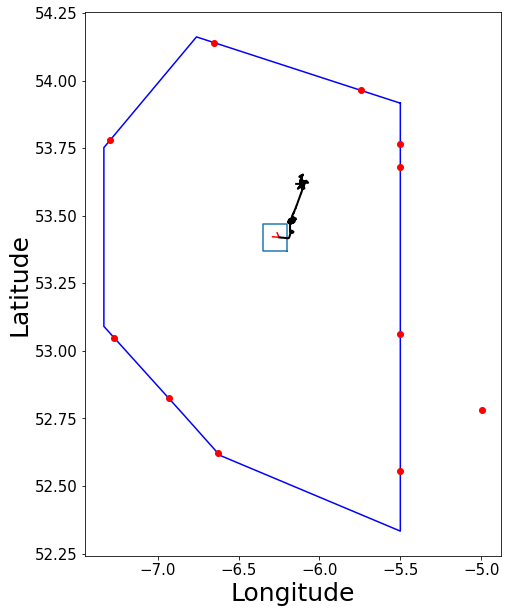

In [32]:
df = EIDW_states_2019_10_week1_df
flight_df = df[df.index.get_level_values('flight_id') == '191004VOR05']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

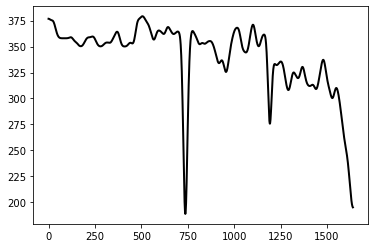

In [33]:
plot_vertical_profile(flight_df, 0, 2)

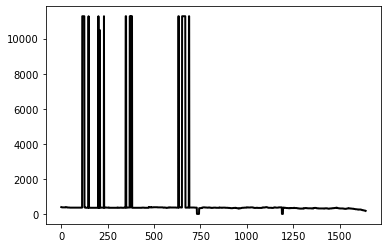

In [34]:
plot_raw_vertical_profile(flight_df, 0, 2)

In [ ]:
flight_df = df[df.index.get_level_values('flight_id') == '191007BTI6A1']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

In [ ]:
flight_df = df[df.index.get_level_values('flight_id') == '191001ETH502']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

flight_df = df[df.index.get_level_values('flight_id') == '191001THY6UG']
plot_horizontal_profile_EIDW(flight_df, "x", 2)

flight_df = df[df.index.get_level_values('flight_id') == '191007BTI6A1']
plot_horizontal_profile_EIDW(flight_df, "x", 2)